![](dragon.jpg)

# OpenCV Introduction

Kevin J. Walchko, Phd

created 20 July 2017

-----------

We are going to start learning about image processing. To do that, we are using OpenCV, which is a standard computer vision library. We are also going to talk about color spaces and about other representations other than the classic RGB color model most people are familar with.

![](rgb-1.png)

 Although we are going to focus on OpenCV, there are other useful libraries out there:
 
 - [dlib:](http://dlib.net/) a machine learning toolbox that can help image recognition
 - [scikit-image:](http://scikit-image.org/) an image processing toolkit which is part of [SciPy](https://www.scipy.org/) or scientific python which aims to a Matlab replacement

## Objectives

- read and write images
- opencv image format
- how to convert between colorspaces
- access video streams from cameras and movies
- affine transformation

## References

- [OpenCV source code on github](https://github.com/opencv/opencv)
- [OpenCV 3.3 Docs](http://docs.opencv.org/3.3.0/)
- [OpenCV 3.3 Python Tutorials](http://docs.opencv.org/3.3.0/d6/d00/tutorial_py_root.html)
- [handee opencv tutorials](https://github.com/handee/opencv-gettingstarted)
- [Wikipedia color spaces](https://en.wikipedia.org/wiki/Color_space)
- [Wikipedia HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV)
- [List of color spaces and their uses](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses)
- [Website to understand RGB and HSV colors](http://colorizer.org/)
- [scikit-image](http://scikit-image.org/docs/dev/auto_examples/index.html)

## Setup

In [1]:
# these imports let you use opencv
import cv2          # opencv itself
import numpy as np  # matrix manipulations
from matplotlib import pyplot as plt

In [2]:
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

# Read/Write an Image

## Read Image

`cv2.imread(filename[, flags]) = image`

- **filename** - Name of file to be loaded.
- **flags** - Flags specifying the color type of a loaded image:
    - CV_LOAD_IMAGE_ANYDEPTH - If set, return 16-bit/32-bit image when the input has the corresponding depth, otherwise convert it to 8-bit.
    - CV_LOAD_IMAGE_COLOR - If set, always convert image to the color one
    - CV_LOAD_IMAGE_GRAYSCALE - If set, always convert image to the grayscale one

You can also pass numbers for your flags:
- \>0 Return a 3-channel color image. Note In the current implementation the alpha channel, if any, is stripped from the output image. Use negative value if you need the alpha channel.
- =0 Return a grayscale image.
- <0 Return the loaded image as is (with alpha channel).

OpenCV, using host libraries, is able to read/write:

- Windows bitmaps - *.bmp, *.dib (always supported)
- JPEG files - *.jpeg, *.jpg, *.jpe (see the Notes section)
- JPEG 2000 files - *.jp2 (see the Notes section)
- Portable Network Graphics - *.png (see the Notes section)
- Portable image format - *.pbm, *.pgm, *.ppm (always supported)
- Sun rasters - *.sr, *.ras (always supported)
- TIFF files - *.tiff, *.tif (see the Notes section)

Now we can open an image:

In [2]:
input_image_bgr=cv2.imread('droids.jpg')

Now python OpenCV stores an image as a `numpy` array of arrays. Basically, there is an array for red, blue, and green. However, OpenCV natively stores them in the order blue, green, and red or BGR. This was a historic decision made back when Intel created this library long ago.

![](numpy_array.png)

Each color channel has its own array with a width and height and the number of channels is called the depth. A color image has a depth of 3 while a grayscale image has a depth of 1.

We can find out various things about that image

In [3]:
print('Image size is height*width*depth:', input_image_bgr.size)

Image size is height*width*depth: 2420736


In [4]:
# you can also think about this as rows, columns, depth
print('Image shape is (height, width, depth):', input_image_bgr.shape)

Image shape is (height, width, depth): (788, 1024, 3)


In [5]:
# images are typically unsigned 8b integers ranging from 0 to 255
print(input_image_bgr.dtype)

uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.

## Writing an Image

`cv2.imwrite(filename, img[, params])`

OpenCV will look at the extention on the file name and save it accordingly (ex. `picture.jpg` saves as JPEG image). Different formats (i.e., PNG, JPEG, TIFF, etc) have different parameters you can pass to do cool things. On average, you don't need them, especially if you are saving to PNG or JPEG.

## Displaying an Image in Jupyter

The line above in setup (`from matplotlib import pyplot as plt`) gives us access to a lot of plotting routines. These are similar to the Matlab routines, but not exactly.

- plt.imshow(*image*): displays an image
- plt.subplot(*rows*, *columns*, *image number*): makes an array of images
- plt.title(*string*): puts a title
- plt.grid(*True or False*): turns on/off the grid

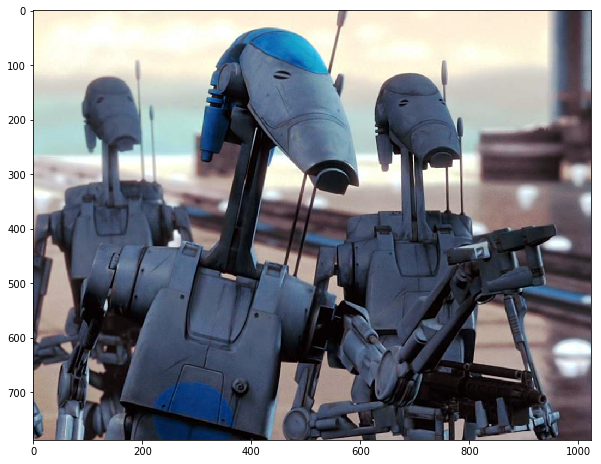

In [10]:
plt.imshow(input_image_bgr);

Again, what this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

## Affine Transforms

In geometry, an affine transformation is a function between affine spaces which preserves points, straight lines and planes. Also, sets of parallel lines remain parallel after an affine transformation. An affine transformation does not necessarily preserve angles between lines or distances between points, though it does preserve ratios of distances between points lying on a straight line.

Examples of affine transformations include translation, scaling, homothety, similarity transformation, reflection, rotation, shear mapping, and compositions of them in any combination and sequence.

$$
affine = \begin{bmatrix}
  R_{2x2} & t_{2x1} \\
  skew & 1
\end{bmatrix}
$$

This matrix should look familar from when we discussed homogeneous transforms. This is just in 2D and not in 3D like before.

![](affine.png)

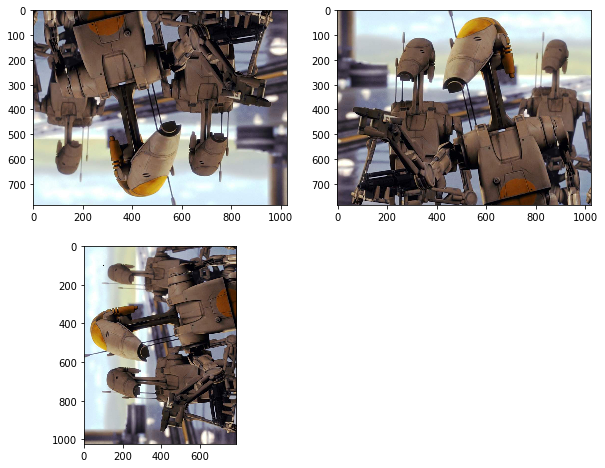

In [24]:
plt.subplot(2,2,1)
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0);

plt.subplot(2,2,2)
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1);

plt.subplot(2,2,3)
transposed=cv2.transpose(input_image) # effectively a rotation
plt.imshow(transposed);

Alternatively, you can use the `rot90` from `numpy`

```
rot90(m, k=1, axes=(0, 1))
    Rotate an array by 90 degrees in the plane specified by axes.
    
    Rotation direction is from the first towards the second axis.
    
    Parameters
    ----------
    m : array_like
        Array of two or more dimensions.
    k : integer
        Number of times the array is rotated by 90 degrees.
    axes: (2,) array_like
        The array is rotated in the plane defined by the axes.
        Axes must be different.
    
    Returns
    -------
    y : ndarray
        A rotated view of `m`.
```

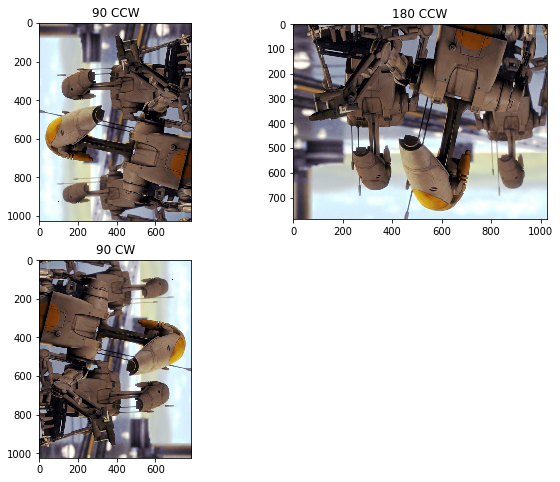

In [25]:
from numpy import rot90

plt.subplot(2,2,1)
r0=rot90(input_image) # rotate 90 CCW
plt.imshow(r0);
plt.title('90 CCW')

plt.subplot(2,2,2)
r1=rot90(input_image, k=2) # rotate 180 CCW
plt.imshow(r1)
plt.title('180 CCW');

plt.subplot(2,2,3)
r2=rot90(input_image, k=-1) # rotate 90 CW
plt.imshow(r2)
plt.title('90 CW');

# Other Useful OpenCV Functions

The reality is, OpenCV is so big and powerful, even if we devoted the entire class to computer vision, we couldn't cover everything. I encourge you to look around and see what else you can do with OpenCV.

However, a few other functions for drawing things on images are listed here:

```python
# draw a red rectangle
# rectangle(image, top-left-corner, bottom-right-corner, color, thickness)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Draw a diagonal blue line with thickness of 5 px
# line(image, start, stop, color, thickness)
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

# draw a circle
# circle(image, center, radius, color, thickness)
img = cv2.circle(img,(447,63), 63, (0,0,255), 1)

# draw a solid circle with line thickness = -1
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# draw text on an image
# putText(image,text,location, font,size,color,thickness,cv2.LINE_AA)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Hello',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
```